In [52]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import matplotlib.cm as cm
import pickle

# Write the file names without the .txt extension
# Mention the extension in the list variable "extend" of corresponding files
'''
paths=["./../BruteForce/","./../KDTree/","./../Shadab/"]
fileNames=["DLAhost_snap49_r1_b1 (copy)","DLAhost_snap49_r1_b1alpha (copy)","DLAhost_snap49_r1_b1T10 (copy)"]
techniques=["BF","KDTree","SHDB"]
'''
'''
paths=["./../BruteForce/","./../KDTree/","./../PKDTree"]
fileNames=["DLAhost_snap49_r1_b1 (copy)","DLAhost_snap49_r1_b1alpha (copy)","DLAhost_snap49_r1_b1T10 (copy)"]
techniques=["BF","KDTree","PKDTree"]
'''
'''
paths=["./../BruteForce/","./../PKDTree/"]
fileNames=["DLAhost_snap49_r1_b1 (copy)","DLAhost_snap49_r1_b1alpha (copy)","DLAhost_snap49_r1_b1T10 (copy)"]
extend=["txt","txt","txt"]
techniques=["BF","PKDTree"]
'''

paths=["./../PKDTree/","./../PKDTree/","./../PKDTree/","./../PKDTree/","./../PKDTree/"]
#paths=["./../PKDTree/","./../PKDTree/"]
#paths=["./../PKDTree/","./../PKDTree/","./../PKDTree/","./../PKDTree/","./../PKDTree/","./../PKDTree/"]
fileNames=["DLAhost_snap49_r1_b1T10 (copy)"]
extend=["txt"]
techniques=["PKDTree E1","PKDTree E2","PKDTree E3","PKDTree E4","PKDTree E5"]
#techniques=["PKDTree E1","PKDTree E2"]
#techniques=["PKDTree 1","PKDTree 2","PKDTree 3","PKDTree 4","PKDTree E1","PKDTree E2"]

setNumber=13
base_dataset_index=-1    # Give the index of the file from list of techniques, wrt which ratios should be computed

colors1=itertools.cycle(["r","g","b"])
colors2=cm.rainbow(np.linspace(0, 1, len(fileNames)*len(techniques)))

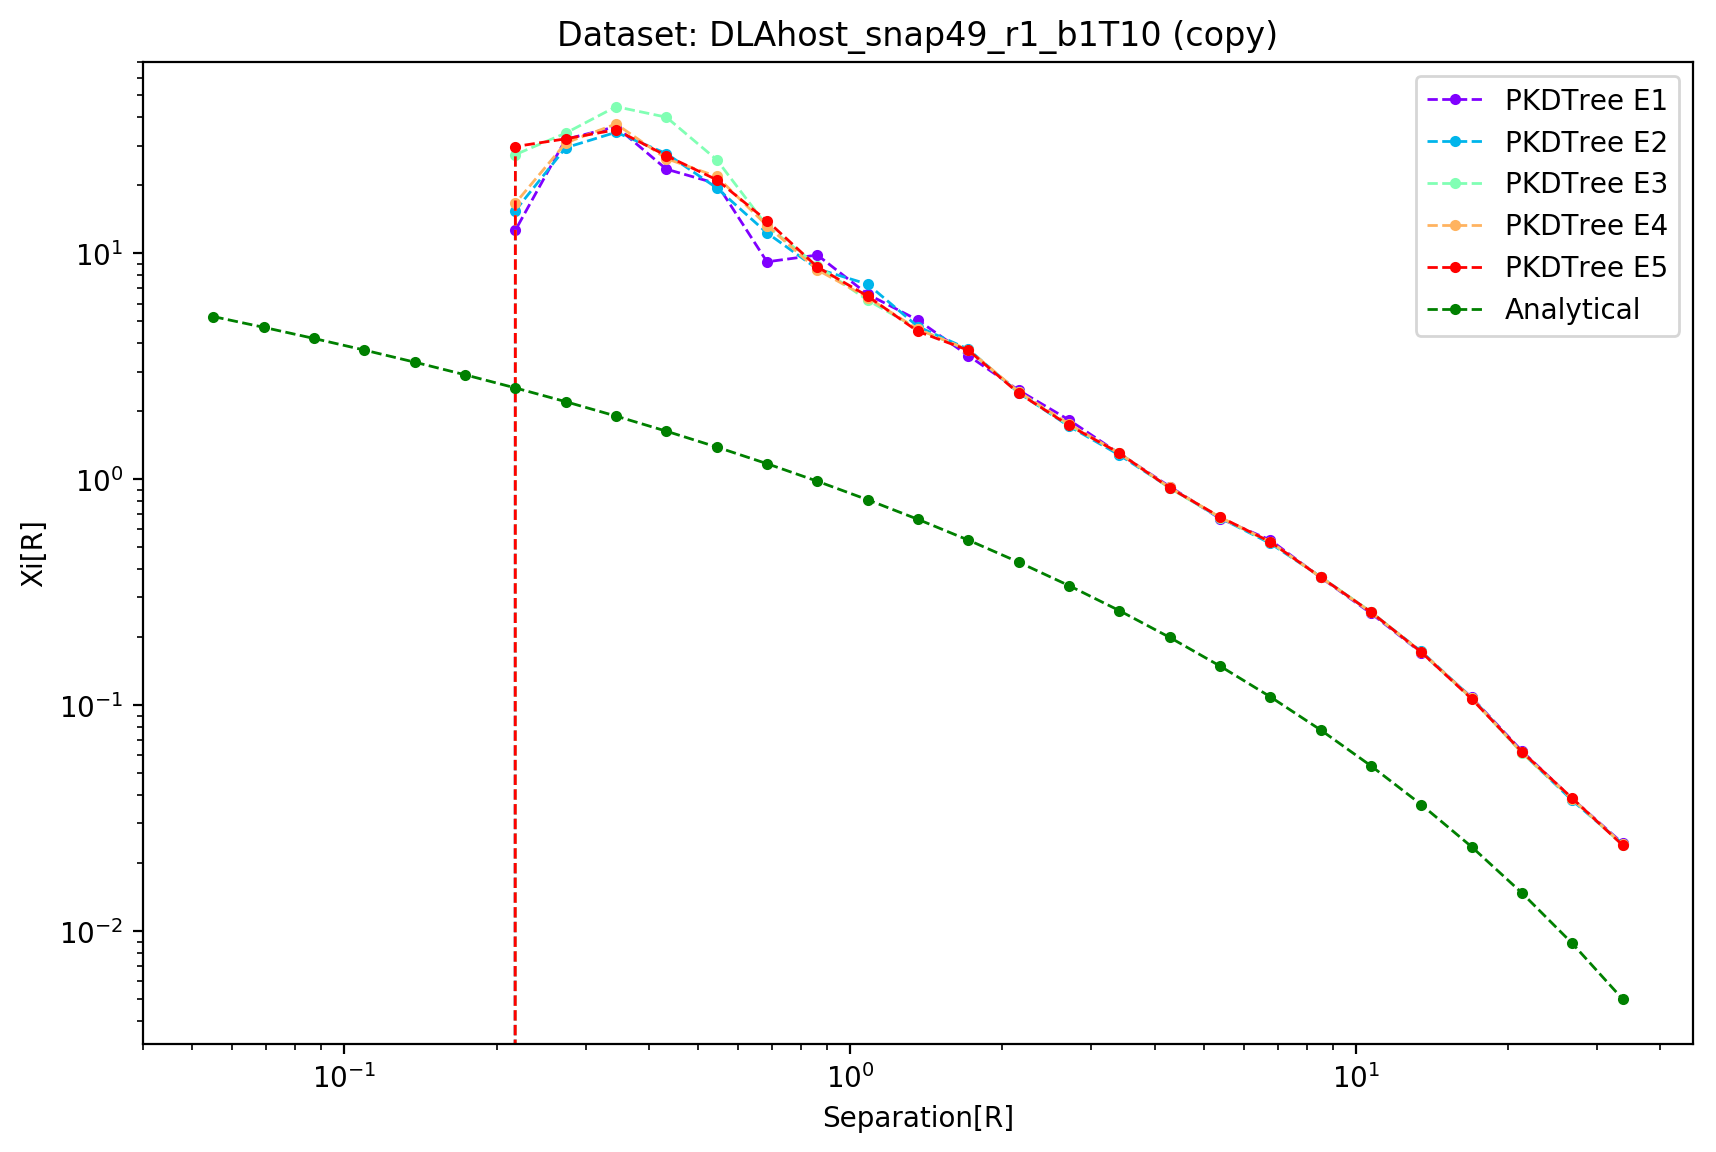

In [57]:
# File reading methods - 'rb'=raw bytes. Will interpret strings as bytes.
figureNum=1
avg=[]
for i in range(0,len(fileNames)):
    plt.figure(figureNum,figsize=(10,6.5), dpi=200, facecolor='w', edgecolor='k')
    for j in range(0,len(techniques)):
        fname=paths[j]+techniques[j]+" "+fileNames[i]+"."+extend[i]
        data=np.loadtxt(fname)
        bins=data[:,0]
        corrs=data[:,1]
        corrs=corrs[bins>10**-0.8]
        bins=bins[bins>10**-0.8]
        
        plt.plot(bins, corrs, color=colors2[i*len(techniques)+j], marker='o', linestyle='dashed',linewidth=1, markersize=3,label=techniques[j])
        
    a2PC=pickle.load(open("./../Analytical 2PC/Analytic2PC.p","rb"))
    aR=pickle.load(open("./../Analytical 2PC/radii.p","rb"))
    plt.plot(aR,a2PC,color='g',marker='o', linestyle='dashed',linewidth=1, markersize=3,label="Analytical")
    
    plt.legend()
    plt.title("Dataset: "+fileNames[i])
    plt.xlabel("Separation[R]")
    plt.ylabel("Xi[R]")
    plt.xscale("log")
    plt.yscale("log")
    #plt.ylim(0.05,2000)
    figureNum+=1
#    plt.savefig('set'+str(setNumber)+'_'+fileNames[i]+'.png', bbox_inches='tight')
plt.show()

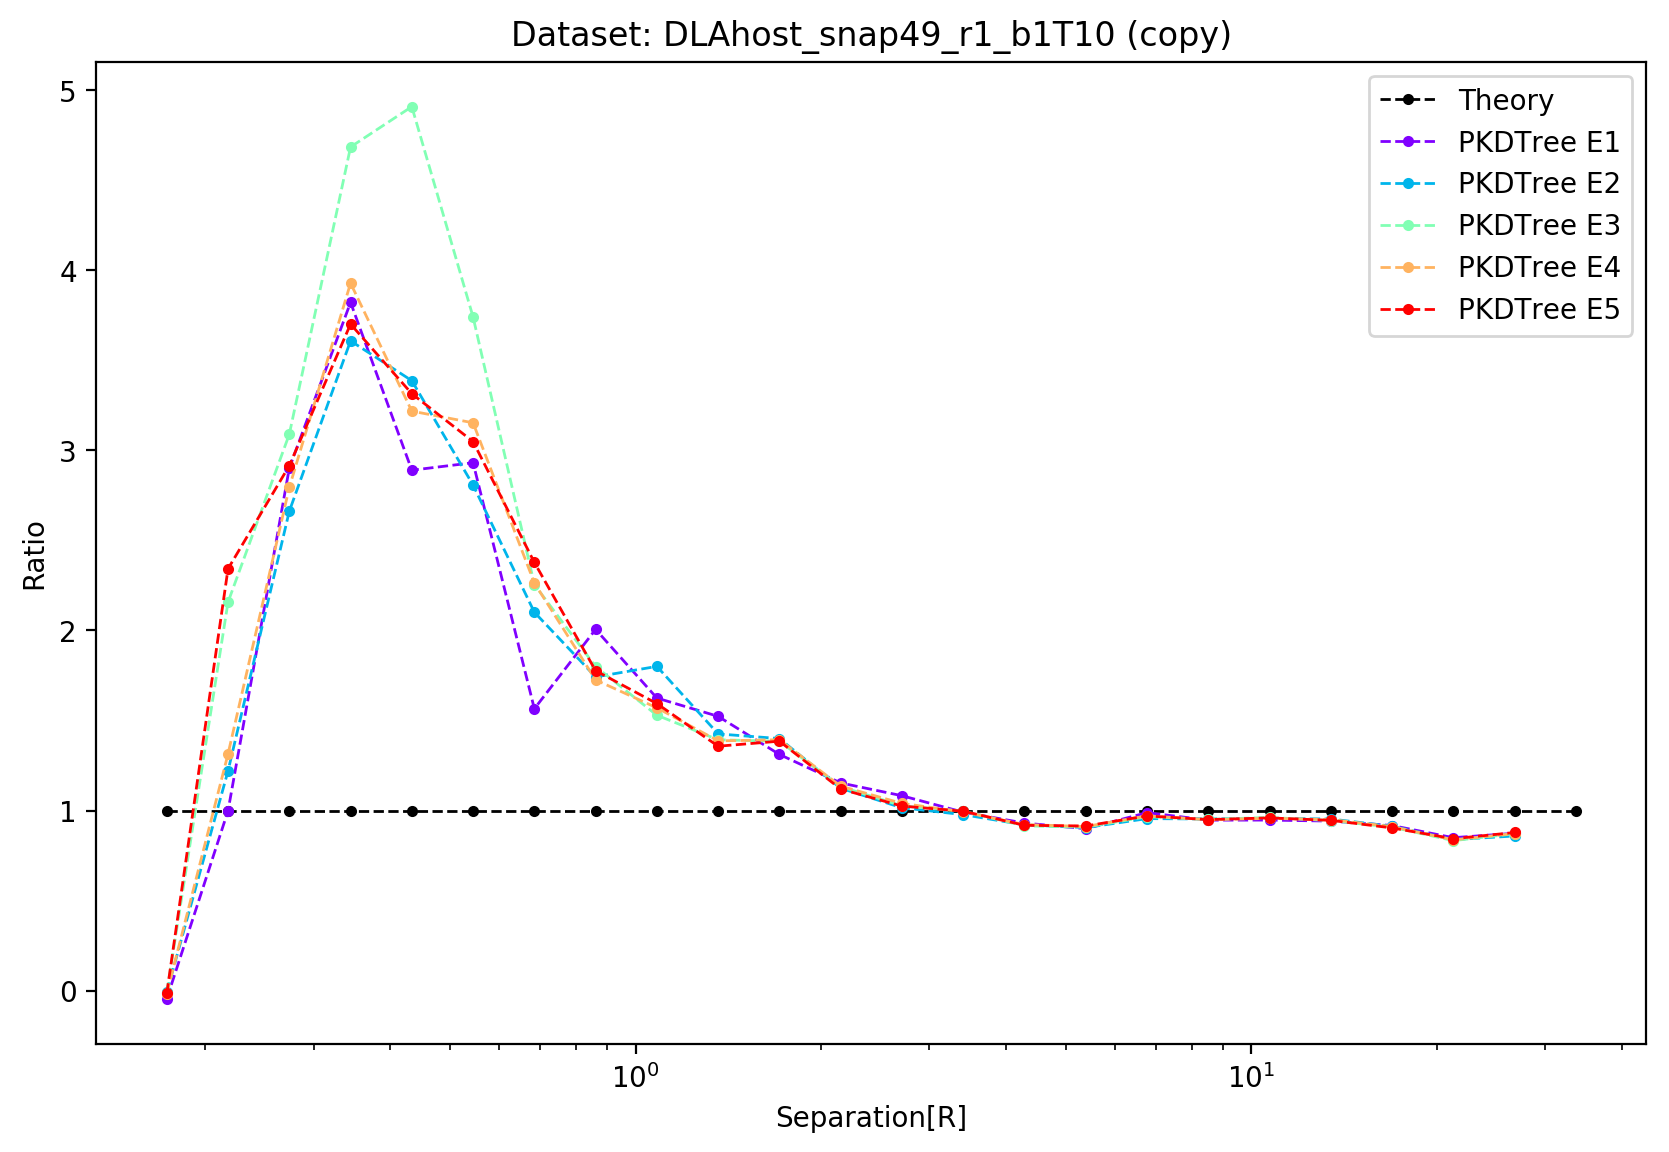

In [59]:
# File reading methods - 'rb'=raw bytes. Will interpret strings as bytes.
# This cell computes the ratios of different datasets
figureNum+=1

for i in range(0,len(fileNames)):
    plt.figure(figureNum,figsize=(10,6.5), dpi=200, facecolor='w', edgecolor='k')
    
    a2PC=pickle.load(open("./../Analytical 2PC/Analytic2PC.p","rb"))
    aR=pickle.load(open("./../Analytical 2PC/radii.p","rb"))

    base_bins=aR[aR>10**-0.8]
    base_corrs=a2PC[aR>10**-0.8]
    '''
    base_file=paths[base_dataset_index]+techniques[base_dataset_index]+" "+fileNames[i]+"."+extend[i]
    base_data=np.loadtxt(base_file)
    base_bins=base_data[:,0]
    base_corrs=base_data[:,1]
    base_corrs=base_corrs[base_bins>10**-0.8]
    base_bins=base_bins[base_bins>10**-0.8]
    '''
    plt.plot(base_bins,base_corrs/base_corrs,color='k',marker='o',linestyle='dashed',linewidth=1, markersize=3,label="Theory")
    
    for j in range(0,len(techniques)):
        if j!=base_dataset_index:
            fname=paths[j]+techniques[j]+" "+fileNames[i]+"."+extend[i]
            data=np.loadtxt(fname)
            corrs=np.interp(base_bins,data[:,0],data[:,1])
            
            plt.plot(base_bins[:-1], (corrs[:-1]/(base_corrs[:-1]*5)),color=colors2[i*len(techniques)+j],marker='o',linestyle='dashed',linewidth=1,markersize=3,label=techniques[j])

#    plt.plot(base_bins,np.ones((base_bins.size)))
 
    plt.legend()
    plt.title("Dataset: "+fileNames[i])
    plt.xlabel("Separation[R]")
    plt.ylabel("Ratio")
    plt.xscale("log")
    #plt.yscale("log")
    #plt.ylim(0.05,2000)
    figureNum+=1
#    plt.savefig('set'+str(setNumber)+'_'+fileNames[i]+'_ratio.png', bbox_inches='tight')
plt.show()